In [29]:
# filter out interesting features
features = ['id','attributes.signature_count','attributes.created_at','attributes.updated_at', 'attributes.opened_at', 'attributes.closed_at', 'attributes.moderation_threshold_reached_at',
       'attributes.response_threshold_reached_at','attributes.government_response_at', 'attributes.government_response.summary',
       'attributes.background','attributes.rejection','attributes.debate_threshold_reached_at', 'attributes.scheduled_debate_date', 'attributes.debate_outcome_at']

df = data[features]


<AxesSubplot:xlabel='attributes.debate_outcome_at'>

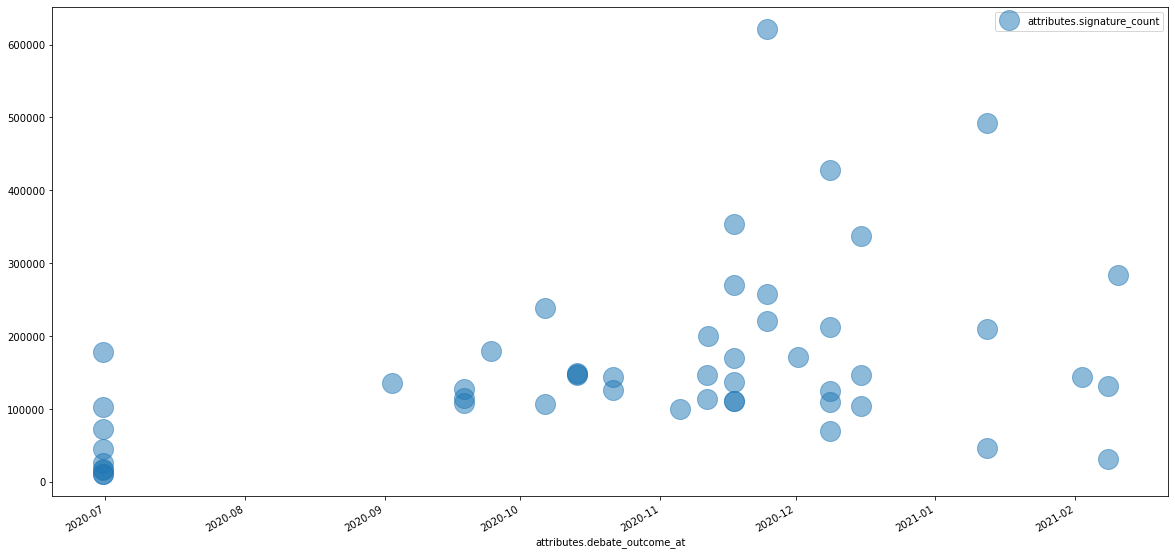

In [32]:
df_sub = df[['attributes.signature_count', 'attributes.debate_outcome_at']].set_index('attributes.debate_outcome_at')
# Converting the index as date
df_sub.index = pd.to_datetime(df_sub.index)
df_sub.plot(figsize=(20,10),style='o',alpha=0.5,markersize=20)

In [17]:
null_features = ['attributes.rejected_at','attributes.rejection']

In [31]:
df[['id', 'attributes.government_response.summary',]].set_index('id').to_csv('/home/william/Datasets/petitions_debated_responses.csv')

Rejected Petitions in Parliament (Reasons for rejection)


In [2]:
data_file = '/home/william/Datasets/petitions_rejected.json'
df = convert_json_to_df(data_file)

In [4]:
df.columns

Index(['type', 'id', 'links.self', 'attributes.action',
       'attributes.background', 'attributes.additional_details',
       'attributes.committee_note', 'attributes.state',
       'attributes.signature_count', 'attributes.created_at',
       'attributes.updated_at', 'attributes.rejected_at',
       'attributes.opened_at', 'attributes.closed_at',
       'attributes.moderation_threshold_reached_at',
       'attributes.response_threshold_reached_at',
       'attributes.government_response_at',
       'attributes.debate_threshold_reached_at',
       'attributes.scheduled_debate_date', 'attributes.debate_outcome_at',
       'attributes.creator_name', 'attributes.rejection.code',
       'attributes.rejection.details', 'attributes.government_response',
       'attributes.debate', 'attributes.departments', 'attributes.topics'],
      dtype='object')

In [8]:
df['attributes.rejection.code'].unique()#['attributes.rejection.details']

array(['duplicate', 'irrelevant', 'honours', 'no-action'], dtype=object)

In [9]:
pd.value_counts(df['attributes.rejection.code'].values.ravel()) 

duplicate     36
irrelevant     7
honours        4
no-action      3
dtype: int64

In [10]:
import numpy as np
np.isscalar(0)

True

In [78]:
pd.value_counts(list_of_rejection_codes) 

duplicate            10450
irrelevant            6270
no-action             2090
honours               1672
already-happening      418
dtype: int64

In [10]:
df = convert_json_to_df(save_loc+data_files[0])

In [17]:
df = df.drop(columns = ['type','attributes.rejection'])

In [26]:
df.columns

Index(['id', 'links.self', 'attributes.action', 'attributes.background',
       'attributes.additional_details', 'attributes.committee_note',
       'attributes.state', 'attributes.signature_count',
       'attributes.created_at', 'attributes.updated_at',
       'attributes.rejected_at', 'attributes.opened_at',
       'attributes.closed_at', 'attributes.moderation_threshold_reached_at',
       'attributes.response_threshold_reached_at',
       'attributes.government_response_at',
       'attributes.debate_threshold_reached_at',
       'attributes.scheduled_debate_date', 'attributes.debate_outcome_at',
       'attributes.creator_name', 'attributes.rejection',
       'attributes.government_response', 'attributes.debate',
       'attributes.departments', 'attributes.topics'],
      dtype='object')

In [33]:
df['attributes.action'][0]

'Designate a day for the recognition of our NHS and all Emergency Services.'

In [49]:
list_of_response_worthy_petitions = []
for data_file in data_files:
    df = convert_json_to_df(save_loc + data_file)
    df = df[df['attributes.signature_count']>10000]
    if len(df) > 0:
        list_of_response_worthy_petitions.append(df)

In [55]:
df = pd.concat(list_of_response_worthy_petitions)

In [57]:
df.columns

Index(['type', 'id', 'links.self', 'attributes.action',
       'attributes.background', 'attributes.additional_details',
       'attributes.committee_note', 'attributes.state',
       'attributes.signature_count', 'attributes.created_at',
       'attributes.updated_at', 'attributes.rejected_at',
       'attributes.opened_at', 'attributes.closed_at',
       'attributes.moderation_threshold_reached_at',
       'attributes.response_threshold_reached_at',
       'attributes.government_response_at',
       'attributes.debate_threshold_reached_at',
       'attributes.scheduled_debate_date', 'attributes.debate_outcome_at',
       'attributes.creator_name', 'attributes.rejection',
       'attributes.government_response.responded_on',
       'attributes.government_response.summary',
       'attributes.government_response.details',
       'attributes.government_response.created_at',
       'attributes.government_response.updated_at',
       'attributes.debate.debated_on', 'attributes.debate.tran

In [59]:
df['attributes.government_response.summary'].unique()

array(['In May 2018 the Government announced £40 million over five years for brain tumour research as part of the Tessa Jowell Brain Cancer Mission. This includes funding for childhood brain tumour research.',
       'The Government is providing comprehensive support to individuals and households impacted by Covid-19, including a £500 million hardship fund for those in receipt of working age council tax support.',
       'The transition period ends on 31 December 2020, as enshrined in UK law. The Prime Minister has made clear he has no intention of changing this. We remain fully committed to negotiations with the EU.',
       'The Government has announced a comprehensive package of support for individuals and businesses which will directly benefit providers of childcare.',
       'The Prime Minister cleared the ISC’s Russia report on 13 December 2019. The Russia Report is the property of the ISC and is for them to publish once the normal reappointment process is complete.',
       'The

In [63]:
df['attributes.rejected_at'].unique()

array([None], dtype=object)

In [1]:
from selenium import webdriver
import requests
import json

# To prevent download dialog
profile = webdriver.FirefoxProfile()
profile.set_preference('browser.download.folderList', 2) # custom location
profile.set_preference('browser.download.manager.showWhenStarting', False)
profile.set_preference('browser.download.dir', '/home/william/Datasets/petitions_website')
profile.set_preference('browser.helperApps.neverAsk.saveToDisk', 'text/csv')

browser = webdriver.Firefox(profile,executable_path='/home/william/Webdriver/bin/geckodriver')
url = 'https://ra.co/events/1326673'
browser.get(url)

In [23]:
from bs4 import BeautifulSoup
html = browser.page_source
soup = BeautifulSoup(html)

for tag in soup.find_all('input'):
    print(tag.text)


In [17]:
browser.find_elements_by_class_name("onsale but")

<li class="onsale but" data-info="Sales close: Thu, 12 Aug 16:00 (GMT Standard Time)." data-zeropriced="0" data-max-tickets-available="4" data-parent-max-tickets="4" data-price="74.0000">
        <input type="radio" id="tickettype429917" data-eventid="1326673" name="tickettypes" value="429917" data-shiptype="[{&quot;id&quot;:432798,&quot;sid&quot;:8}]">
        <label for="tickettype429917">
            <div class="pr8">Live In Vehicle Pass</div>
            <div class="type-price">£70.00 + £4.00</div>
        </label>
    </li>

[]

In [26]:
browser.find_elements_by_xpath("/html/body/div[1]/div/div/ul/li[1]/ul/li/ul[1]")

[]

In [ ]:

        <input type="radio" id="tickettype429917" data-eventid="1326673" name="tickettypes" value="429917" data-shiptype="[{&quot;id&quot;:432798,&quot;sid&quot;:8}]">
        <label for="tickettype429917">
            <div class="pr8">Live In Vehicle Pass</div>
            <div class="type-price">£70.00 + £4.00</div>
        </label>
    

In [5]:
import os
save_loc = '/home/william/Datasets/petitions_website/closed/'
data_files = os.listdir(save_loc)

In [40]:

list_of_close_dates = []
for data_file in data_files:
    df = convert_json_to_df(save_loc + data_file)
    df = df[['attributes.signature_count','attributes.closed_at']]
    if len(df) > 0:
        list_of_close_dates.append(df)

In [97]:
df = pd.concat(list_of_close_dates)
df['attributes.closed_at'] = pd.to_datetime(df['attributes.closed_at'])
df = df.set_index('attributes.closed_at')
df = df.sort_index()
df_rolled = df.rolling('14D', min_periods=1).mean()

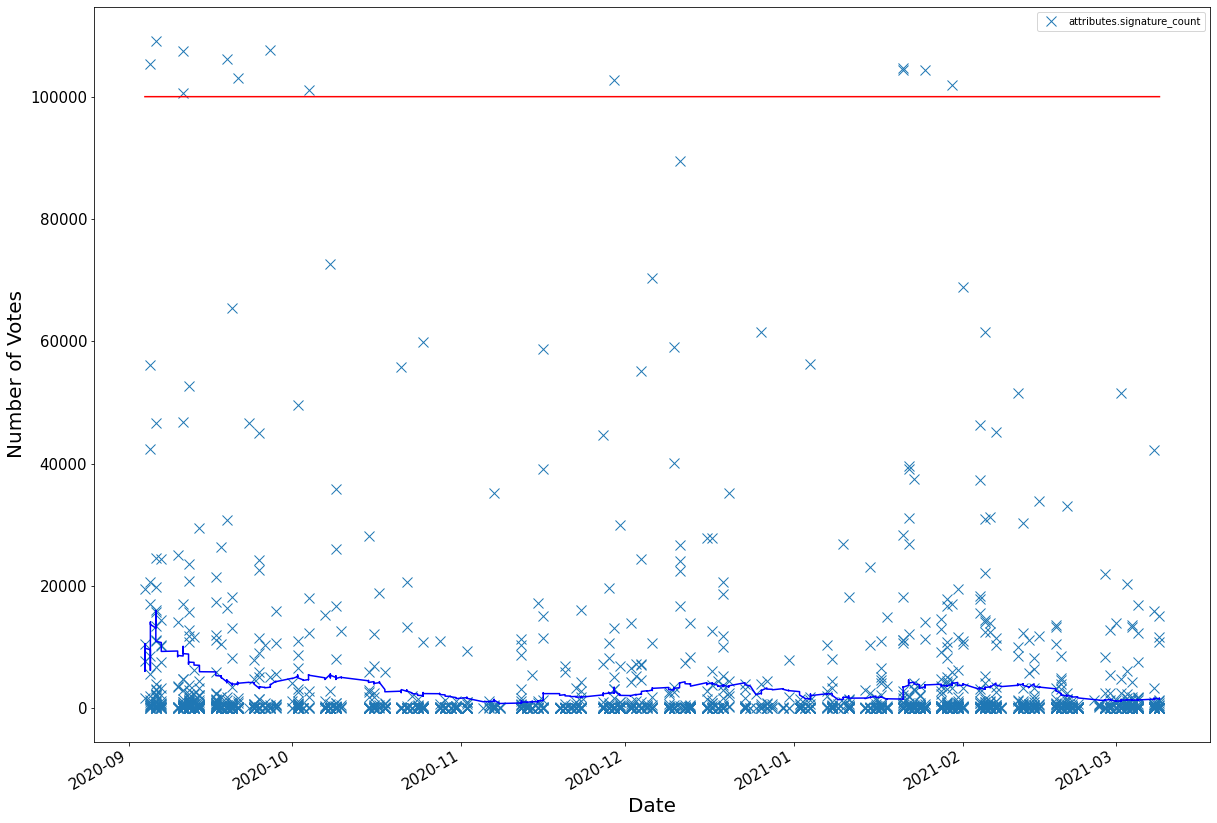

In [98]:
ax = df.plot(marker='x',linestyle='', figsize=(20,15), markersize = 10)
ax.legend()
df['threshold'] = 100000
ax.plot(df['threshold'],color='red')
ax.plot(df_rolled,color='blue')
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Number of Votes', fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 10)

In [84]:
# df_times = df[['attributes.signature_count', 'attributes.created_at',
#        'attributes.updated_at',
#        'attributes.opened_at', 'attributes.closed_at',
#        'attributes.moderation_threshold_reached_at']]



,attributes.signature_count,threshold
attributes.closed_at,,
2020-09-03 22:59:59.999000+00:00,10517.000000,100000.0
2020-09-03 22:59:59.999000+00:00,6060.500000,100000.0
2020-09-03 22:59:59.999000+00:00,10531.000000,100000.0
2020-09-03 22:59:59.999000+00:00,9812.250000,100000.0
2020-09-04 22:59:59.999000+00:00,8563.000000,100000.0
...,...,...
2021-03-08 23:59:59.999000+00:00,1357.526316,100000.0
2021-03-08 23:59:59.999000+00:00,1330.850000,100000.0
2021-03-08 23:59:59.999000+00:00,1292.333333,100000.0


In [36]:
df_times['attributes.closed_at'] = pd.to_datetime(df_times['attributes.closed_at'])

<ipython-input-36-c08995b30edd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_times['attributes.closed_at'] = pd.to_datetime(df_times['attributes.closed_at'])


<AxesSubplot:xlabel='attributes.closed_at'>

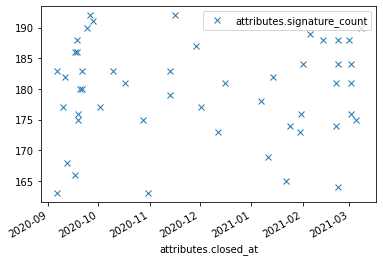

In [37]:
df_times.set_index('attributes.closed_at').plot(marker='x',linestyle='')

In [34]:
df_times

,attributes.signature_count,attributes.created_at,attributes.updated_at,attributes.opened_at,attributes.closed_at,attributes.moderation_threshold_reached_at
0,192,2020-03-23 12:49:55.168000+00:00,2020-11-16T00:00:09.078Z,2020-05-15T14:04:42.740Z,2020-03-23 12:49:55.168000+00:00,2020-03-23T15:43:04.000Z
1,192,2020-03-15 21:48:46.157000+00:00,2020-09-25T23:00:00.525Z,2020-03-25T09:07:40.222Z,2020-03-15 21:48:46.157000+00:00,2020-03-15T22:10:04.000Z
2,191,2020-03-14 20:41:02.097000+00:00,2020-09-27T23:00:00.532Z,2020-03-27T11:10:22.368Z,2020-03-14 20:41:02.097000+00:00,2020-03-16T00:37:54.000Z
3,190,2020-06-26 18:44:18.493000+00:00,2021-03-08T00:00:04.900Z,2020-09-07T15:18:00.132Z,2020-06-26 18:44:18.493000+00:00,2020-06-26T18:56:24.000Z
4,190,2020-03-13 19:55:35.969000+00:00,2020-09-23T23:00:07.109Z,2020-03-23T17:20:30.669Z,2020-03-13 19:55:35.969000+00:00,2020-03-15T11:16:54.000Z
5,189,2020-07-26 09:14:21.158000+00:00,2021-02-05T00:00:08.436Z,2020-08-04T10:02:03.883Z,2020-07-26 09:14:21.158000+00:00,2020-07-26T09:33:54.000Z
6,188,2020-08-04 16:27:11.886000+00:00,2021-02-13T00:00:05.581Z,2020-08-12T10:19:41.225Z,2020-08-04 16:27:11.886000+00:00,2020-08-04T16:49:44.000Z
7,188,2020-06-18 19:49:11.024000+00:00,2021-03-01T00:00:06.037Z,2020-08-28T13:53:31.107Z,2020-06-18 19:49:11.024000+00:00,2020-06-18T20:04:14.000Z
8,188,2020-06-11 19:02:04.881000+00:00,2021-02-22T00:00:04.642Z,2020-08-21T15:44:05.579Z,2020-06-11 19:02:04.881000+00:00,2020-06-11T20:34:04.000Z
9,188,2020-03-11 14:20:04.976000+00:00,2020-09-17T23:00:02.111Z,2020-03-17T12:46:19.830Z,2020-03-11 14:20:04.976000+00:00,2020-03-11T14:43:34.000Z
